# TDA  with Python using the Gudhi Library  

# Persistent homology and persistence diagrams

In [1]:
import numpy as np
import pandas as pd
import gudhi as gd  
from sklearn import manifold
from pylab import *
# %matplotlib inline
# import sklearn_tda

### Persistent homology and persistence diagram

One strong motivation for defining homology groups is the fact that two shapes can be distinguished by examining their holes.

Persistent homology is a powerful tool to compute, study and encode efficiently multiscale topological features  of nested families of simplicial complexes and topological spaces. It encodes the evolution of the homology groups of the nested complexes (holes) across the scales.

In the example below we consider the filtration given by a union of growing balls centered on the finite set of points $C$. 
<img src="Images/persistence.png"  style="width: 600px;"/>


a) For the radius r = 0, the union of balls is reduced to the initial finite set of point, each of them corresponding to a 0-dimensional feature, i.e. a connected component; an interval is created for the birth for each of these features at r = 0.  

b) Some of the balls started to overlap resulting in the death of some connected components that get merged together; the persistence diagram keeps track of these deaths, putting an end point to the corresponding intervals as they disappear.    

c) New components have merged giving rise to a single connected component and, so, all the intervals associated to a 0-dimensional feature have been ended, except the one corresponding to the remaining components; two new 1-dimensional features, have appeared resulting in two new intervals (in blue) starting at their birth scale.  

d) One of the two 1-dimensional cycles has been filled, resulting in its death in the filtration and the end of the corresponding blue interval.     

e) all the 1-dimensional features have died, it only remains the long (and never dying) red interval. 

The final barcode can also be equivalently represented as **a persistence diagram** where every interval (a,b) is represented by the the point of coordinate (a,b) in $\mathbb R^2$. 

Intuitively the longer is an interval in the barcode or, equivalently the farther from the diagonal is the corresponding point in the diagram, the more persistent, and thus relevant, is the corresponding homological feature across the filtration. 
 
          

### Protein binding dataset

The data we study in this notebook pertains to configurations of protein binding. This example is borrowed from the paper of Kovacev-Nikolic et al. [[1]](https://arxiv.org/pdf/1412.1394.pdf).

The paper compares closed and open forms of the maltose-binding protein (MBP), a large biomolecule containing $370$ amino-acid residues. The analysis is not based on geometric distances in $\mathbb R^3$ but on a metric of *dynamical distances* defined by

$$ D_{ij} = 1 - |C_{ij}|, $$

where $C$ is the correlation matrix between residues.

Correlation matrices between residues can be found at this [link](https://www.researchgate.net/publication/301543862_corr). We are greatful to the authors for sharing data.

We start from the Vietoris-Rips filtrations of the Protein binding distance matrices. See this [previous tutorial](https://github.com/GUDHI/TDA-tutorial/blob/master/Tuto-GUDHI-simplicial-complexes-from-distance-matrix.ipynb) for more details on how to build the Rips complex.

In [2]:
path_file = "./datasets/Corr_ProteinBinding/"
files_list = [
    '1anf.corr_1.txt', 
    '1ez9.corr_1.txt', 
    '1fqa.corr_2.txt', 
    '1fqb.corr_3.txt', 
    '1fqc.corr_2.txt', 
    '1fqd.corr_3.txt', 
    '1jw4.corr_4.txt', 
    '1jw5.corr_5.txt', 
    '1lls.corr_6.txt', 
    '1mpd.corr_4.txt', 
    '1omp.corr_7.txt', 
    '3hpi.corr_5.txt', 
    '3mbp.corr_6.txt', 
    '4mbp.corr_7.txt'
]

corr_list = [pd.read_csv(path_file + u,
                         header = None,
                         delim_whitespace = True) for u in files_list]

dist_list = [ 1- np.abs(c) for c in corr_list]

We first consider the first distance matrix:

In [3]:
D0 = dist_list[0]

### Persistence barcodes and persistence diagrams

We build the Vietoris-Rips complex from the distance matrix `D0`. See this [notebook](https://github.com/GUDHI/TDA-tutorial/blob/master/Tuto-GUDHI-simplicial-complexes-from-distance-matrix.ipynb) for more details.

In [4]:
skeleton_protein0 = gd.RipsComplex(
    distance_matrix = D0.values, 
    max_edge_length = 0.8
) 

Rips_simplex_tree_protein0 = skeleton_protein0.create_simplex_tree(max_dimension = 2)

Now we can compute persistence on the simplex tree structure using the `persistence()` method of the simplex tree class:

In [5]:
BarCodes_Rips0 = Rips_simplex_tree_protein0.persistence()

The object `BarCodes_Rips0` is the list of barcodes: each element in the list is a tuple **(dim,(b,d)) where dim is a dimension, b is birth parameter  and d is death parameter**.

Let's print the 20 first elements in the list:

In [6]:
for i in range(20):
    print(BarCodes_Rips0[i])

(1, (0.07963602000000003, 0.35798637))
(1, (0.12677510000000003, 0.39508646999999997))
(1, (0.26003449999999995, 0.5273952))
(1, (0.07943339999999999, 0.31429881000000004))
(1, (0.08248586999999996, 0.30429980999999995))
(1, (0.11378021999999999, 0.31171713999999995))
(1, (0.07726765000000002, 0.26078758))
(1, (0.09107215000000002, 0.25065161999999996))
(1, (0.0709843, 0.22765623000000001))
(1, (0.09347402000000005, 0.24999733000000002))
(1, (0.07013614000000001, 0.22504734000000004))
(1, (0.08752541000000003, 0.20355559))
(1, (0.21541215000000002, 0.32814707))
(1, (0.06835270000000004, 0.17527247))
(1, (0.08857625000000002, 0.19539684000000002))
(1, (0.08241111999999995, 0.18353136999999997))
(1, (0.10362273, 0.20264340000000003))
(1, (0.09289979999999998, 0.19181444000000003))
(1, (0.09581541999999998, 0.19310879999999997))
(1, (0.09541275000000005, 0.18175165000000004))


These 20 topolological features have dimension 1, they corresponds to holes of dimension 1.

We have access to persistence_intervals per dimension using the `persistence_intervals_in_dimension()` method, for instance for dimension 0:

In [7]:
Rips_simplex_tree_protein0.persistence_intervals_in_dimension(0)

array([[0.        , 0.01498817],
       [0.        , 0.01614179],
       [0.        , 0.01618629],
       [0.        , 0.01964641],
       [0.        , 0.02002598],
       [0.        , 0.02019621],
       [0.        , 0.02128167],
       [0.        , 0.02139837],
       [0.        , 0.02189414],
       [0.        , 0.02211046],
       [0.        , 0.02279135],
       [0.        , 0.02305466],
       [0.        , 0.02376384],
       [0.        , 0.02398958],
       [0.        , 0.02427977],
       [0.        , 0.02431161],
       [0.        , 0.02514183],
       [0.        , 0.0252621 ],
       [0.        , 0.025566  ],
       [0.        , 0.02572414],
       [0.        , 0.02668906],
       [0.        , 0.02703624],
       [0.        , 0.02723942],
       [0.        , 0.02730715],
       [0.        , 0.02737215],
       [0.        , 0.02743006],
       [0.        , 0.02758413],
       [0.        , 0.02769299],
       [0.        , 0.0277112 ],
       [0.        , 0.02815389],
       [0.

The last bars (0.0, inf) die at infinity.

In [8]:
Rips_simplex_tree_protein0.persistence_intervals_in_dimension(1)

array([[0.04601636, 0.04802719],
       [0.04462223, 0.05246951],
       [0.05606075, 0.05817749],
       [0.05451866, 0.05907852],
       [0.05578675, 0.0597986 ],
       [0.04931398, 0.0599879 ],
       [0.05147044, 0.06301476],
       [0.05195284, 0.06301476],
       [0.05698116, 0.0653876 ],
       [0.06655375, 0.06876108],
       [0.06477151, 0.06949571],
       [0.07052816, 0.07071995],
       [0.06174749, 0.07186117],
       [0.07185594, 0.07258585],
       [0.06518198, 0.07311192],
       [0.07549923, 0.08065806],
       [0.0819493 , 0.0821311 ],
       [0.07588111, 0.08279519],
       [0.07980278, 0.08346552],
       [0.0780059 , 0.08437442],
       [0.0772973 , 0.08644014],
       [0.08404635, 0.08816479],
       [0.05715569, 0.08870497],
       [0.07052735, 0.09056702],
       [0.084208  , 0.09139486],
       [0.09013533, 0.09300383],
       [0.0786832 , 0.09317159],
       [0.06275369, 0.09338012],
       [0.06725438, 0.0944722 ],
       [0.09316844, 0.09466733],
       [0.

Finally we can plot the points (birth, death) in the so-called **persistence diagram**:

In [9]:
Rips_simplex_tree_protein0.persistence_intervals_in_dimension(2)

array([], shape=(0, 2), dtype=float64)

usetex mode requires TeX.


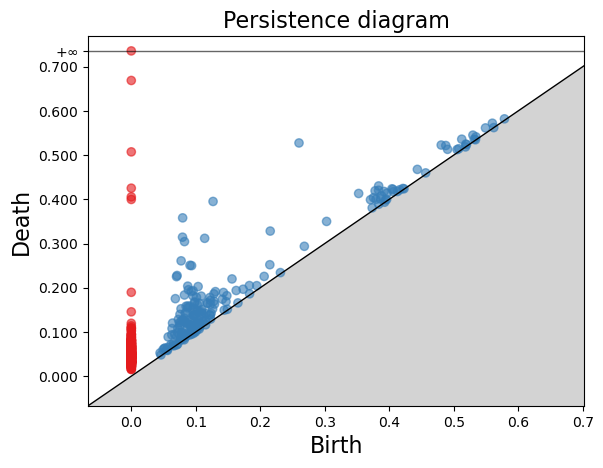

In [10]:
gd.plot_persistence_diagram(BarCodes_Rips0);

In this representation, $0$-dimensional features are the red points (holes of dimension $0$, namely connected components). The last connected component dies at infinity in the filtration (red point at the top). The $1$-dimensional features are represented in blue. 

The most persistent topological features are those points that are far from the diagonal. Further in the tutorial we give statistical methods to identify significant topological features.

Note that this representation does not say which points are "at the origin" of a given feature. Moreover, a given topological feature (namely a homology class that corresponds to a hole of dimension $d$) is by definition a class of cycles defined on the point cloud and thus it can be represented by several cycles.

### Bottleneck distance

To exploit the topological information and topological features inferred from persistent homology, one needs to be able to compare persistence diagrams.

We see a persistence diagram as the union of its points and of the diagonal, where the point of the diagonal are counted with infinite multiplicity. 

A matching  between two diagrams $\mathrm{dgm}_1$ and $\mathrm{dgm}_2$ is a subset $m \subseteq \mathrm{dgm}_1 \times \mathrm{dgm}_2$ such that every points in $\mathrm{dgm}_1 \setminus \Delta$ and $\mathrm{dgm}_2 \setminus \Delta$ appears exactly once in $m$. 

<img src="Images/MatchingDiag.png"  style="width: 400px;"/>

The **Bottleneck distance** between $\mathrm{dgm}_1$ and $\mathrm{dgm}_2$ is then defined by

$$
\mathrm{d}_b (\mathrm{dgm}1, \mathrm{dgm}_2) =\inf_{\scriptsize{\mbox{matching}} \ m} \max_{(p,q) \in m} \| p-q \|_\infty.
$$

Let us compute the Rips complex filtration for another configuration of protein

In [11]:
D1 = dist_list[1]

skeleton_protein1 = gd.RipsComplex(
    distance_matrix = D1.values, 
    max_edge_length = 0.8
) 

Rips_simplex_tree_protein1 = skeleton_protein1.create_simplex_tree(max_dimension = 2)

and the barcode for this filtration:

In [12]:
BarCodes_Rips1 = Rips_simplex_tree_protein1.persistence()

In [13]:
BarCodes_Rips1

[(1, (0.07670708000000004, 0.34456504)),
 (1, (0.07563936000000004, 0.32909086)),
 (1, (0.08637329999999999, 0.3382193)),
 (1, (0.23195695000000005, 0.48100106)),
 (1, (0.06836666000000002, 0.31082308999999997)),
 (1, (0.09598083999999996, 0.32555904999999996)),
 (1, (0.08029297000000002, 0.30936757000000004)),
 (1, (0.08095227999999999, 0.25957450000000004)),
 (1, (0.07877933000000004, 0.25282238)),
 (1, (0.08865140000000005, 0.23934679999999997)),
 (1, (0.08544333000000004, 0.22473308999999997)),
 (1, (0.10543663000000003, 0.22798934000000004)),
 (1, (0.07605194000000004, 0.19600934000000003)),
 (1, (0.09610927000000002, 0.20690182999999995)),
 (1, (0.08170575000000002, 0.18732287000000003)),
 (1, (0.18854229, 0.29359533000000004)),
 (1, (0.06898842000000005, 0.17260357000000004)),
 (1, (0.10895357000000006, 0.21120006999999996)),
 (1, (0.07377031999999994, 0.17407607999999997)),
 (1, (0.06777416999999997, 0.16253326)),
 (1, (0.08850449999999999, 0.17564649)),
 (1, (0.08282106, 0.167

The bottleneck distance between the two persistence diagrams can be computed using the <code>bottleneck_distance()</code> function. The bottleneck distance is computed per dimension (for dimension 1 in the example below). We can give in argument of the function the persistence_intervals for a given dimension, which can be computed using the `persistence_intervals_in_dimension()` function. 


In [14]:
I0 = Rips_simplex_tree_protein0.persistence_intervals_in_dimension(1)
I1 = Rips_simplex_tree_protein1.persistence_intervals_in_dimension(1)

gd.bottleneck_distance(I0, I1)

0.05052142999999998

By default, the function uses an expensive algorithm to compute the exact bottleneck distance. It is also possible to compute an approximated bottleneck distance (additional approximation error given in argument), which is usually a lot faster to compute. See the [documention](https://gudhi.inria.fr/python/latest/bottleneck_distance_user.html#gudhi.bottleneck_distance) for more details.

In [15]:
gd.bottleneck_distance(I0, I1, 0.01)

0.04995895755237128

### MDS on the Bottleneck distances

A simple approach for comparing the MPB configurations is to use the Bottleneck distances between configurations. We first compute the Rips complex filtration for each MPB:

In [34]:
persistence_list0 = []
persistence_list1 = []

i=0
for d in dist_list:
    print(i)
    rips_complex = gd.RipsComplex(
        distance_matrix = d.values, 
        max_edge_length = 0.8
    )
    simplex_tree = rips_complex.create_simplex_tree(max_dimension = 2)
    diag = simplex_tree.persistence()#----------------------------------------------------
    #simplex_tree.persistence()
    persistence_list0.append(simplex_tree.persistence_intervals_in_dimension(0))
    persistence_list1.append(simplex_tree.persistence_intervals_in_dimension(1))
    i = i + 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13


In [35]:
persistence_list0
len(persistence_list0)
type(persistence_list0)

list

Next, we compute the matrix of Bottleneck distances for dimensions $0$ and $1$:

In [36]:
l = len(files_list)
B0 = np.zeros((l, l))
B1 = np.zeros((l, l))

In [37]:
for i in range(l):
    for j in range(i):
        B0[i,j] = gd.bottleneck_distance(persistence_list0[i], persistence_list0[j])
        B1[i,j] = gd.bottleneck_distance(persistence_list1[i], persistence_list1[j])

In [41]:
B0
#B0.shape

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.27012237, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.20270489, 0.08062446, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.23304443, 0.05610207, 0.04354652, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.10767524, 0.25558757, 0.19339696, 0.21850963, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.12799122, 0.26251234, 0.2

In [42]:
import pandas as pd

pd.DataFrame(B0)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.270122,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.202705,0.080624,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.233044,0.056102,0.043547,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.107675,0.255588,0.193397,0.218510,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
5,0.127991,0.262512,0.233916,0.230274,0.078304,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
6,0.304321,0.063501,0.114823,0.071276,0.289786,0.296711,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
7,0.202705,0.126080,0.045456,0.089002,0.233646,0.274165,0.160279,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
8,0.202705,0.116334,0.039829,0.079256,0.207307,0.247826,0.150533,0.034223,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
9,0.110548,0.299952,0.219327,0.262874,0.183384,0.223903,0.334150,0.182367,0.183617,0.000000,0.000000,0.000000,0.000000,0.0


In [43]:
#--------------------
B0 = B0 + B0.transpose()
B1 = B1 + B1.transpose()

In [44]:
pd.DataFrame(B0)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.000000,0.270122,0.202705,0.233044,0.107675,0.127991,0.304321,0.202705,0.202705,0.110548,0.293964,0.132072,0.084153,0.153674
1,0.270122,0.000000,0.080624,0.056102,0.255588,0.262512,0.063501,0.126080,0.116334,0.299952,0.074268,0.251684,0.226303,0.235209
2,0.202705,0.080624,0.000000,0.043547,0.193397,0.233916,0.114823,0.045456,0.039829,0.219327,0.104466,0.171060,0.204101,0.185801
3,0.233044,0.056102,0.043547,0.000000,0.218510,0.230274,0.071276,0.089002,0.079256,0.262874,0.063455,0.214607,0.194646,0.198131
4,0.107675,0.255588,0.193397,0.218510,0.000000,0.078304,0.289786,0.233646,0.207307,0.183384,0.279429,0.099561,0.111989,0.118944
5,0.127991,0.262512,0.233916,0.230274,0.078304,0.000000,0.296711,0.274165,0.247826,0.223903,0.293729,0.140080,0.139322,0.159463
6,0.304321,0.063501,0.114823,0.071276,0.289786,0.296711,0.000000,0.160279,0.150533,0.334150,0.020315,0.285883,0.260502,0.269407
7,0.202705,0.126080,0.045456,0.089002,0.233646,0.274165,0.160279,0.000000,0.034223,0.182367,0.149921,0.151718,0.204101,0.186869
8,0.202705,0.116334,0.039829,0.079256,0.207307,0.247826,0.150533,0.034223,0.000000,0.183617,0.140175,0.135350,0.204101,0.177056
9,0.110548,0.299952,0.219327,0.262874,0.183384,0.223903,0.334150,0.182367,0.183617,0.000000,0.323793,0.083823,0.084581,0.095130


We apply a Multidimensional Scaling method (from the [<code>scikit-learn</code>](http://scikit-learn.org/stable/) library)  to visualize the Bottleneck distances:

In [30]:
mds = manifold.MDS(
    n_components = 2, 
    max_iter = 3000, 
    eps = 1e-9, 
    dissimilarity = "precomputed", 
    n_jobs = 1
)
pos = mds.fit(B0).embedding_

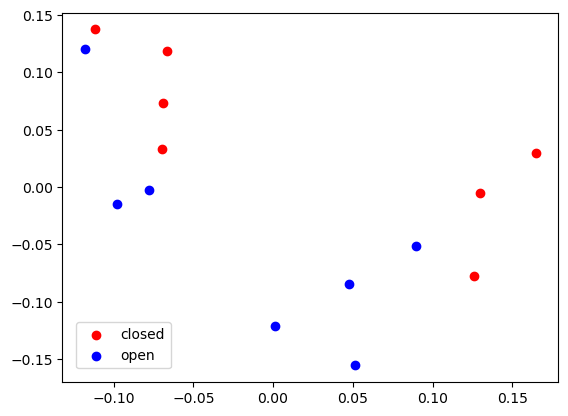

In [31]:
plt.scatter(pos[0:7, 0], pos[0:7, 1], color = 'red' , label = "closed")
plt.scatter(pos[7:l, 0], pos[7:l, 1], color = 'blue', label = "open")
plt.legend(loc = 3, borderaxespad = 1);

In [32]:
pos = mds.fit(B1).embedding_

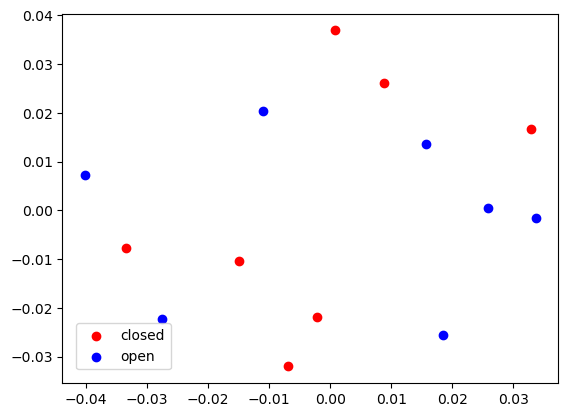

In [33]:
plt.scatter(pos[0:7, 0], pos[0:7, 1], color = 'red' , label = "closed")
plt.scatter(pos[7:l, 0], pos[7:l, 1], color = 'blue', label = "open")
plt.legend(loc = 3, borderaxespad = 1);